# Is Proactive Policing Effective?
Loren Atherley & Carl Sharpe

In [1]:
from IPython.display import HTML, display
display(HTML("<style>.container { width:100% !important; }</style>")) 

## Probabalistic Time Series Analysis

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_excel('timeseries.xlsx')
df.index = pd.to_datetime(df['Date'])
df[['Call Rate','Crime Rate']].plot()
plt.xlabel('Date')
plt.title('Crime / Call Rate Plot')
plt.ylabel('Rate')
df[['Person Rate','Property Rate','Society Rate']].plot()
plt.xlabel('Date')
plt.title('Crime Rates Plot - by Crime Group')
plt.ylabel('Rate')
df[['Onview Rate','Dispatch Rate']].plot()
plt.xlabel('Date')
plt.title('Call Rates - by Call Type')
plt.ylabel('Rate')

Text(0,0.5,'Rate')

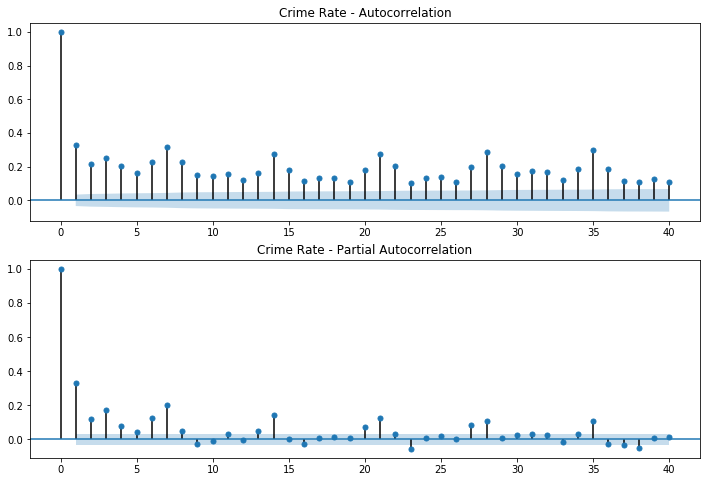

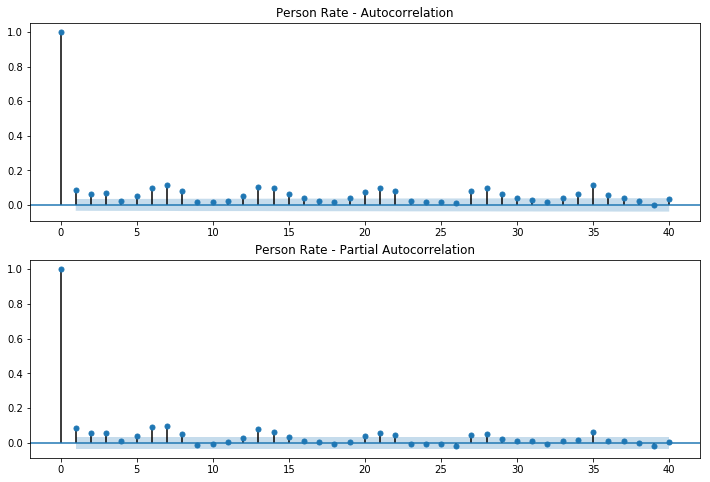

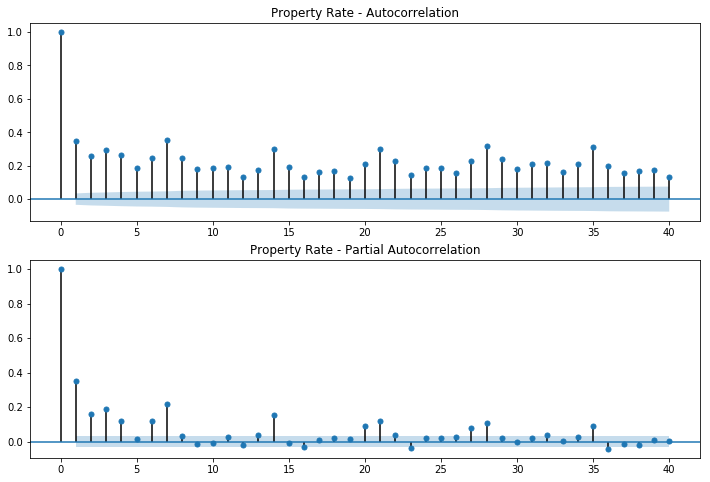

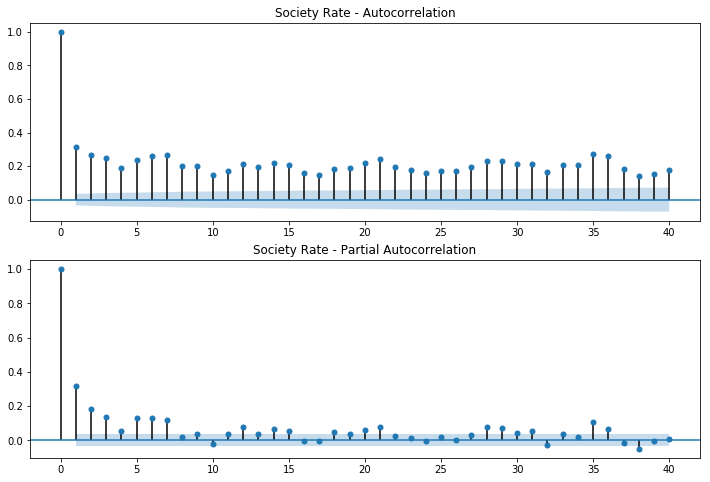

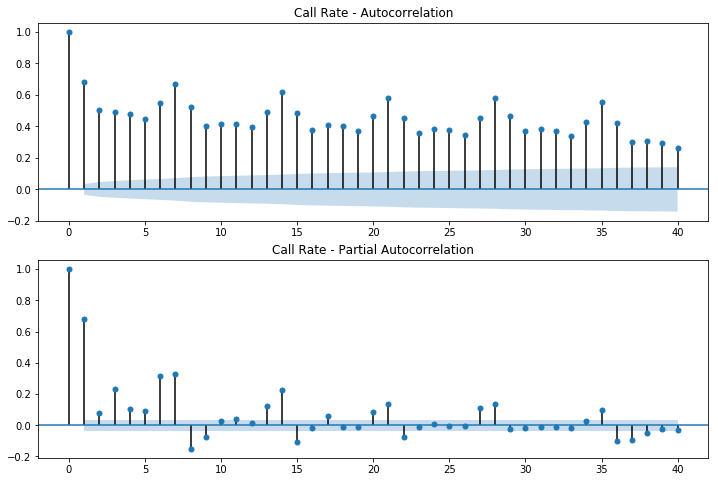

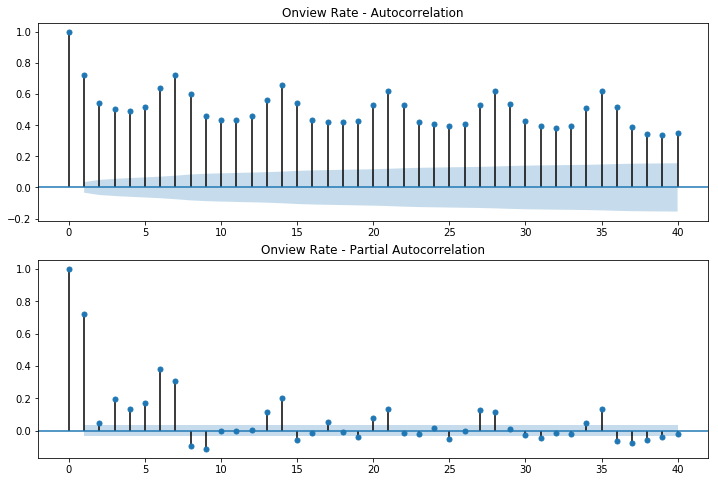

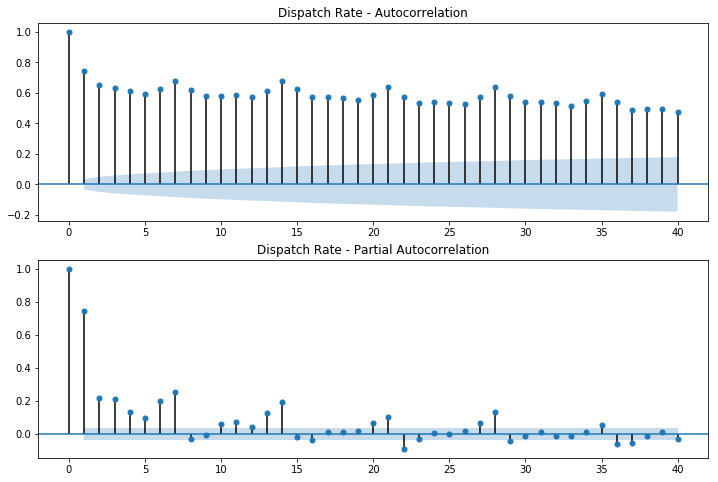

In [3]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Crime Rate'], lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Crime Rate'], lags = 40, ax=ax2)
ax1.set_title('Crime Rate - Autocorrelation')
ax2.set_title('Crime Rate - Partial Autocorrelation')
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Person Rate'], lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Person Rate'], lags = 40, ax=ax2)
ax1.set_title('Person Rate - Autocorrelation')
ax2.set_title('Person Rate - Partial Autocorrelation')
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Property Rate'], lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Property Rate'], lags = 40, ax=ax2)
ax1.set_title('Property Rate - Autocorrelation')
ax2.set_title('Property Rate - Partial Autocorrelation')
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Society Rate'], lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Society Rate'], lags = 40, ax=ax2)
ax1.set_title('Society Rate - Autocorrelation')
ax2.set_title('Society Rate - Partial Autocorrelation')
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Call Rate'], lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Call Rate'], lags = 40, ax=ax2)
ax1.set_title('Call Rate - Autocorrelation')
ax2.set_title('Call Rate - Partial Autocorrelation')
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Onview Rate'], lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Onview Rate'], lags = 40, ax=ax2)
ax1.set_title('Onview Rate - Autocorrelation')
ax2.set_title('Onview Rate - Partial Autocorrelation')
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Dispatch Rate'], lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Dispatch Rate'], lags = 40, ax=ax2)
ax1.set_title('Dispatch Rate - Autocorrelation')
ax2.set_title('Dispatch Rate - Partial Autocorrelation')
plt.show()


In [4]:
from statsmodels.tsa.stattools import adfuller as adf

x = df['Crime Rate']
result = adf(x, autolag = 'AIC')
print('Crime Rate ADF')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(' ')

    
x = df['Person Rate']
result = adf(x, autolag = 'AIC')
print('Person Rate ADF')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(' ')

    
x = df['Society Rate']
result = adf(x, autolag = 'AIC')
print('Society Rate ADF')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(' ')

x = df['Call Rate']
result = adf(x, autolag = 'AIC')
print('Call Rate ADF')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) 
print(' ')

x= df['Onview Rate']
result = adf(x, autolag = 'AIC')
print('Onview Rate ADF')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(' ')

x = df['Dispatch Rate']
result = adf(x, autolag = 'AIC')
print('Dispatch Rate ADF')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Crime Rate ADF
ADF Statistic: -4.925528
p-value: 0.000031
 
Person Rate ADF
ADF Statistic: -6.924194
p-value: 0.000000
 
Society Rate ADF
ADF Statistic: -4.132956
p-value: 0.000854
 
Call Rate ADF
ADF Statistic: -3.340854
p-value: 0.013148
 
Onview Rate ADF
ADF Statistic: -3.193775
p-value: 0.020348
 
Dispatch Rate ADF
ADF Statistic: -2.515565
p-value: 0.111733
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


Cannot reject the null hypothesis for the Dispatch Rate - Difference the Dispatch Rate

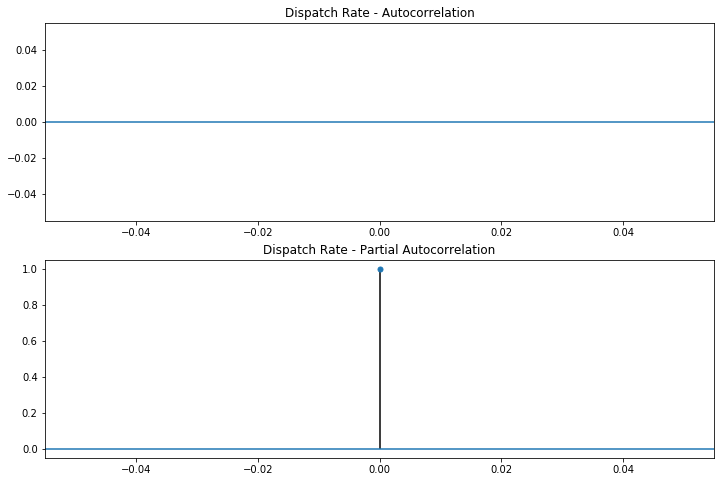

In [7]:
# Doesnt look right
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Dispatch Rate'].diff(), lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Dispatch Rate'].diff(), lags = 40, ax=ax2)
ax1.set_title('Dispatch Rate - Autocorrelation')
ax2.set_title('Dispatch Rate - Partial Autocorrelation')
plt.show()

Run ARIMA

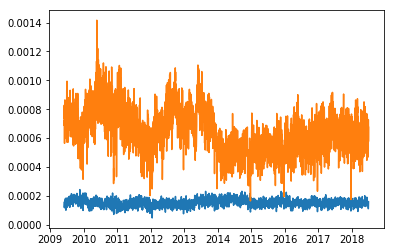

In [10]:
plt.plot(df[['Property Rate','Onview Rate']])